In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.sparse import hstack
from tqdm import tqdm
# from sklearn.metrics import roc_curve, auc , plot_roc_curve

In [3]:
from prettytable import PrettyTable
pt = PrettyTable()

pt.field_names = ["Vectorizer", "Model", "Hyper-parameter", "AUC"]

##Reading dataset from gdrive

In [4]:
data = pd.read_csv('/content/gdrive/My Drive/Datasets/preprocessed_data.csv')

In [5]:
data.project_is_approved.value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

#Splitting dataset

In [6]:
X = data.drop('project_is_approved',axis=1)
y = data['project_is_approved']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,shuffle = True,random_state = 42)

In [8]:
x_train.shape

(76473, 8)

#Encoding Categorical variables

In [9]:
vect_ohe = CountVectorizer()       #vectorizer for one hot encoding (ohe)

x_train_state = vect_ohe.fit_transform(x_train['school_state'].values)
x_test_state = vect_ohe.transform(x_test['school_state'].values)

x_train_teacher = vect_ohe.fit_transform(x_train['teacher_prefix'].values)
x_test_teacher = vect_ohe.transform(x_test['teacher_prefix'].values)

x_train_grade = vect_ohe.fit_transform(x_train['project_grade_category'].values)
x_test_grade = vect_ohe.transform(x_test['project_grade_category'].values)

x_train_clean = vect_ohe.fit_transform(x_train['clean_categories'].values)
x_test_clean = vect_ohe.transform(x_test['clean_categories'].values)

x_train_clean_sub = vect_ohe.fit_transform(x_train['clean_subcategories'].values)
x_test_clean_sub = vect_ohe.transform(x_test['clean_subcategories'].values)

In [10]:
# Normalizing numerical features

normalizer = Normalizer()

x_train_price= normalizer.fit_transform(x_train['price'].values.reshape(1,-1))
x_test_price= normalizer.fit_transform(x_test['price'].values.reshape(1,-1))

x_train_teacher_ppp = normalizer.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_teacher_ppp = normalizer.fit_transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))


##Essays TFIDF

In [11]:
tfidf_vect = TfidfVectorizer(min_df=10,max_features=2500,)
# tfidf_vect.fit_transform(x_train['essay'].values)
x_tr_essay_tfidf = tfidf_vect.fit_transform(x_train['essay'].values)
x_te_essay_tfidf = tfidf_vect.transform(x_test['essay'].values)

In [ ]:
# tfidf_vect.get_feature_names()

##Sentiment Score

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
sid = SentimentIntensityAnalyzer()

In [ ]:
data.essay[7]

'it not enough read book write essay connect deeply understand core subjects i want engage students imagination creativity reasoning i hope introducing creative problem solving skills required movie making i jump start future my students come diverse family situations increasing number lower income levels we recently designated title i school students receive free breakfast lunch many non english speaking parents working multiple jobs i disproportionate number struggling readers 2 years behind they good kids want improve skills traditional methods seem help they become easily frustrated unmotivated when i use creative approaches student written plays comic strips presentations engaged produce higher quality work displaying greater confidence material i want productive times increase help become students want movie making involves imagination critical thinking skills well strong understanding material i believe successfully strategy supporting students academic growth desire learn ignit

##Creating a dataframe for polarity scores and later appendind the scores to x_train features

In [14]:
#Train data

s1 = {'neg':[],'neu':[],'pos':[],'compound':[]}
for i in tqdm(x_train.index):
  ss = sid.polarity_scores(x_train.loc[i,'essay'])
  # ss1 = sid.polarity_scores(x_train['essay'])
  # print(ss.keys())
  s1['neg'].append(ss['neg'])
  s1['neu'].append(ss['neu'])
  s1['pos'].append(ss['pos'])
  s1['compound'].append(ss['compound'])
print(s1)
sentiment = pd.DataFrame(s1,index=x_train.index)
  

100%|██████████| 76473/76473 [02:48<00:00, 454.73it/s]


{'neg': [0.022, 0.037, 0.015, 0.049, 0.048, 0.034, 0.033, 0.05, 0.04, 0.049, 0.028, 0.113, 0.035, 0.0, 0.041, 0.076, 0.104, 0.095, 0.023, 0.128, 0.087, 0.0, 0.036, 0.011, 0.018, 0.033, 0.034, 0.026, 0.012, 0.068, 0.068, 0.028, 0.048, 0.02, 0.014, 0.049, 0.096, 0.057, 0.072, 0.021, 0.024, 0.063, 0.068, 0.078, 0.06, 0.01, 0.023, 0.0, 0.074, 0.108, 0.042, 0.066, 0.0, 0.0, 0.08, 0.028, 0.015, 0.018, 0.016, 0.103, 0.072, 0.048, 0.026, 0.077, 0.085, 0.0, 0.016, 0.021, 0.083, 0.016, 0.101, 0.045, 0.053, 0.017, 0.071, 0.028, 0.095, 0.039, 0.07, 0.041, 0.088, 0.044, 0.06, 0.097, 0.029, 0.09, 0.052, 0.091, 0.022, 0.024, 0.038, 0.012, 0.063, 0.025, 0.016, 0.022, 0.044, 0.038, 0.111, 0.026, 0.116, 0.014, 0.053, 0.047, 0.024, 0.027, 0.035, 0.049, 0.018, 0.055, 0.027, 0.043, 0.026, 0.03, 0.047, 0.025, 0.032, 0.057, 0.066, 0.012, 0.1, 0.012, 0.075, 0.0, 0.021, 0.041, 0.034, 0.044, 0.013, 0.033, 0.0, 0.03, 0.074, 0.026, 0.116, 0.051, 0.032, 0.07, 0.067, 0.032, 0.01, 0.014, 0.018, 0.083, 0.11, 0.136, 0

In [ ]:
sentiment.shape

(76473, 4)

In [15]:
#Test data

s2 = {'neg':[],'neu':[],'pos':[],'compound':[]}
for i in tqdm(x_test.index):
  ss = sid.polarity_scores(x_test.loc[i,'essay'])
  # ss1 = sid.polarity_scores(x_train['essay'])
  # print(ss.keys())
  s2['neg'].append(ss['neg'])
  s2['neu'].append(ss['neu'])
  s2['pos'].append(ss['pos'])
  s2['compound'].append(ss['compound'])
print(s2)
sentiment_test = pd.DataFrame(s2,index=x_test.index)

100%|██████████| 32775/32775 [01:13<00:00, 443.71it/s]


{'neg': [0.011, 0.05, 0.055, 0.086, 0.033, 0.0, 0.035, 0.024, 0.052, 0.059, 0.068, 0.022, 0.011, 0.013, 0.094, 0.023, 0.0, 0.083, 0.054, 0.0, 0.01, 0.05, 0.044, 0.022, 0.086, 0.049, 0.051, 0.036, 0.118, 0.042, 0.049, 0.042, 0.111, 0.112, 0.009, 0.079, 0.031, 0.046, 0.0, 0.1, 0.105, 0.081, 0.011, 0.09, 0.044, 0.046, 0.016, 0.082, 0.031, 0.102, 0.083, 0.031, 0.105, 0.113, 0.071, 0.012, 0.035, 0.013, 0.055, 0.019, 0.06, 0.046, 0.088, 0.06, 0.0, 0.059, 0.046, 0.073, 0.061, 0.015, 0.07, 0.0, 0.07, 0.058, 0.037, 0.031, 0.105, 0.016, 0.029, 0.065, 0.0, 0.013, 0.044, 0.032, 0.016, 0.029, 0.064, 0.035, 0.0, 0.071, 0.07, 0.023, 0.017, 0.038, 0.014, 0.032, 0.0, 0.039, 0.063, 0.051, 0.0, 0.033, 0.011, 0.065, 0.055, 0.016, 0.056, 0.032, 0.039, 0.044, 0.102, 0.0, 0.028, 0.049, 0.028, 0.036, 0.018, 0.084, 0.047, 0.046, 0.038, 0.024, 0.018, 0.069, 0.056, 0.035, 0.133, 0.06, 0.083, 0.016, 0.023, 0.03, 0.0, 0.042, 0.081, 0.114, 0.08, 0.013, 0.045, 0.031, 0.054, 0.062, 0.021, 0.087, 0.018, 0.119, 0.029, 

In [ ]:
sentiment.values

array([[0.022 , 0.528 , 0.45  , 0.9989],
       [0.037 , 0.805 , 0.158 , 0.9761],
       [0.015 , 0.795 , 0.19  , 0.981 ],
       ...,
       [0.    , 0.799 , 0.201 , 0.9895],
       [0.049 , 0.615 , 0.337 , 0.9969],
       [0.    , 0.756 , 0.244 , 0.9895]])

In [ ]:
# def sentiment(x):
# ss = x_train['essay'].apply(lambda x : sid.polarity_scores(x).values())

#TFIDF model

In [16]:
x_tr_tfidf = hstack(( x_train_state, x_train_teacher, x_train_grade, x_train_clean_sub,x_train_clean,x_train_price.T,x_train_teacher_ppp.T,x_tr_essay_tfidf,sentiment.values)).tocsr()
x_te_tfidf = hstack(( x_test_state, x_test_teacher, x_test_grade, x_test_clean_sub,x_test_clean,x_test_price.T,x_test_teacher_ppp.T,x_te_essay_tfidf,sentiment_test.values)).tocsr()


In [ ]:

model = DecisionTreeClassifier(random_state=10)

In [ ]:
params = {'max_depth':[1,5,10,50] ,'min_samples_split' : [5,10,100,500]}#,'alpha':[0.01,0.1,1,1]}

In [ ]:
grid_clf = GridSearchCV(model , param_grid = params, cv = 3, scoring='roc_auc',n_jobs = -1, return_train_score = True)

In [ ]:
grid_clf.fit(x_tr_tfidf,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'mi

In [ ]:
grid_clf.best_params_                               # getting the best params

{'max_depth': 10, 'min_samples_split': 500}

In [ ]:
grid_clf.best_score_

0.652095478338859

In [ ]:
scores = pd.DataFrame.from_dict(grid_clf.cv_results_)

In [ ]:
scores.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.5928,0.058287,0.03701,0.002734,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.557426,0.556467,0.540926,0.551607,0.007562,11,0.552131,0.552663,0.552904,0.552566,0.000323


##Visualizing the CV results w.r.t AUC score for combination of parameters

In [ ]:
heat_test = scores.pivot('param_max_depth','param_min_samples_split','mean_test_score')

In [ ]:
heat_train = scores.pivot('param_max_depth','param_min_samples_split','mean_train_score')

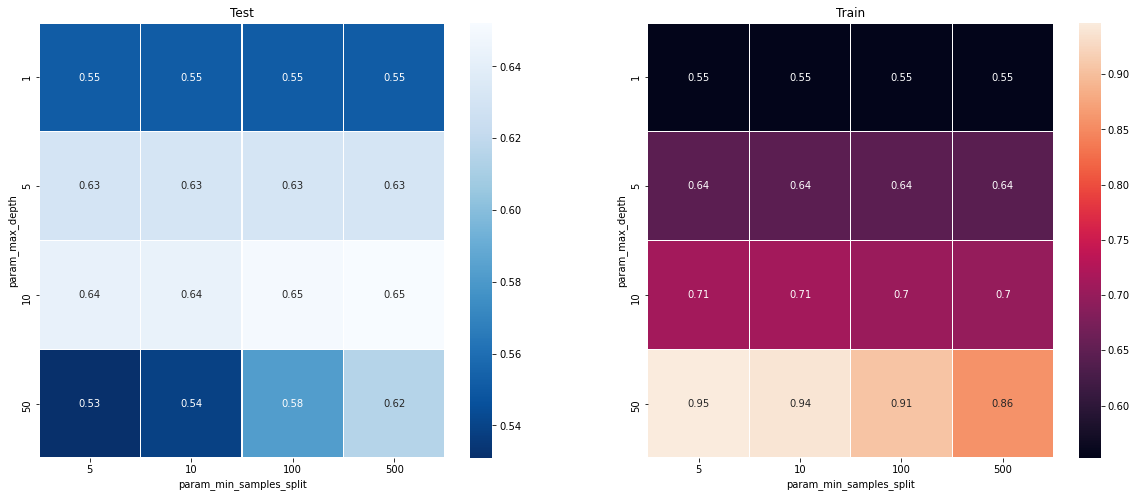

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Test')
sns.heatmap(heat_test,annot=True,cmap='Blues_r',linewidths=0.1)
plt.subplot(1,2,2)
plt.title('Train')
sns.heatmap(heat_train,annot = True,linewidths=0.1)

##Final model based on best params

In [ ]:
fin_model = DecisionTreeClassifier(max_depth=grid_clf.best_params_['max_depth'],min_samples_split=grid_clf.best_params_['min_samples_split'],random_state=10)

In [ ]:
fin_model.fit(x_tr_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
x_pred = fin_model.predict(x_tr_tfidf)

In [ ]:
y_pred = fin_model.predict(x_te_tfidf)

changes from predict to predict_proba since the ROC will take the unique points(threshold) into consideration when plotting the curve

In [ ]:
x_pred_proba = fin_model.predict_proba(x_tr_tfidf)

In [ ]:
y_pred_proba = fin_model.predict_proba(x_te_tfidf)

In [ ]:
y_pred_proba

array([[0.21713878, 0.78286122],
       [0.09397645, 0.90602355],
       [0.08091787, 0.91908213],
       ...,
       [0.05743846, 0.94256154],
       [0.08091787, 0.91908213],
       [0.13732028, 0.86267972]])

In [ ]:
y_pred_proba.flatten()[1::2]

array([0.78286122, 0.90602355, 0.91908213, ..., 0.94256154, 0.91908213,
       0.86267972])

##Plotting ROC curve for train and test results

In [ ]:
from sklearn.metrics import roc_curve, auc , plot_roc_curve

In [ ]:
# Getting the TPR and FPR values for ROC curve

x_tr_fpr,x_tr_tpr,x_tr_thresh = roc_curve(y_train,x_pred_proba.flatten()[1::2])
x_te_fpr,x_te_tpr,x_te_thresh = roc_curve(y_test,y_pred_proba.flatten()[1::2])

In [ ]:
print(auc(x_tr_fpr, x_tr_tpr))

0.6988792822354126


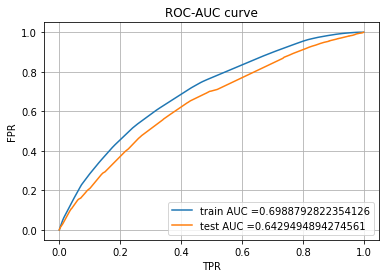

In [ ]:
plt.plot(x_tr_fpr, x_tr_tpr, label="train AUC ="+str(auc(x_tr_fpr, x_tr_tpr)))
plt.plot(x_te_fpr, x_te_tpr, label="test AUC ="+str(auc(x_te_fpr, x_te_tpr)))
plt.legend()
plt.xlabel('TPR')
plt.ylabel("FPR")
plt.title("ROC-AUC curve")
plt.grid()
plt.show()

In [ ]:
pt.add_row(['TFIDF','Decision Tree',f'{grid_clf.best_params_}',str(auc(x_te_fpr, x_te_tpr))])

In [ ]:
# print(pt)

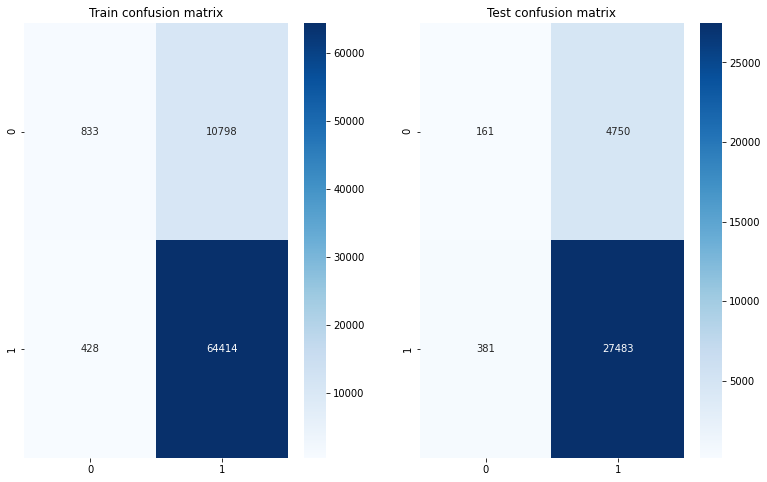

In [ ]:
from sklearn.metrics import confusion_matrix
# best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.title("Train confusion matrix")
sns.heatmap(confusion_matrix(y_train, x_pred),annot=True,fmt="d",cmap='Blues')
plt.subplot(1,2,2)
plt.title("Test confusion matrix")
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d",cmap='Blues')
plt.show()

##False positives

In [ ]:
# test_pred = pd.Series(y_pred,index=y_test.index,name='Pred')
# test_pred

105447    1
69262     1
55966     1
1860      1
35390     1
         ..
22811     1
35248     1
102361    1
105065    1
102559    1
Name: Pred, Length: 32775, dtype: int64

In [ ]:
y_pred_1  = pd.Series(y_pred,index = y_test.index,name = 'y_pred')

In [ ]:
# pd.concat([x_test,y_test,test_pred],axis=1,ignore_index=True)

In [ ]:
df_test = pd.concat([x_test,y_test,y_pred_1],axis=1)

In [ ]:
df_test.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_is_approved,y_pred
105447,tx,ms,grades_9_12,1,appliedlearning,college_careerprep extracurricular,these particular students advanced journalism ...,230.57,1,1
69262,ma,mrs,grades_6_8,11,math_science,environmentalscience,nrms located cape cod area rich natural resour...,1176.13,0,1


In [ ]:
df_test_fp = df_test[(df_test['project_is_approved'] == 0) & (df_test['y_pred'] == 1)]

In [ ]:
df_test_fp.shape

(4750, 10)

In [ ]:
# Getting all the essays in all FP rows and storing them in a single variable

x_fp_text = df_test_fp['essay'].str.cat(sep = ' ')

##Wordcloud viz for words in FP dataset

In [ ]:
from wordcloud import WordCloud, STOPWORDS

https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(x_fp_text)

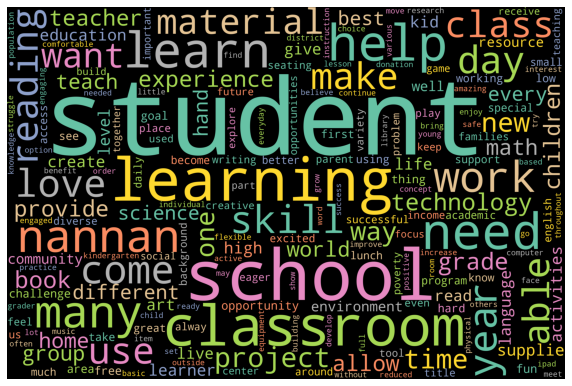

In [ ]:
plt.figure(figsize=(10,8))
plt.axis("off")
plt.imshow(wordcloud)

##Boxplot and PDF on numerical variables in FP data

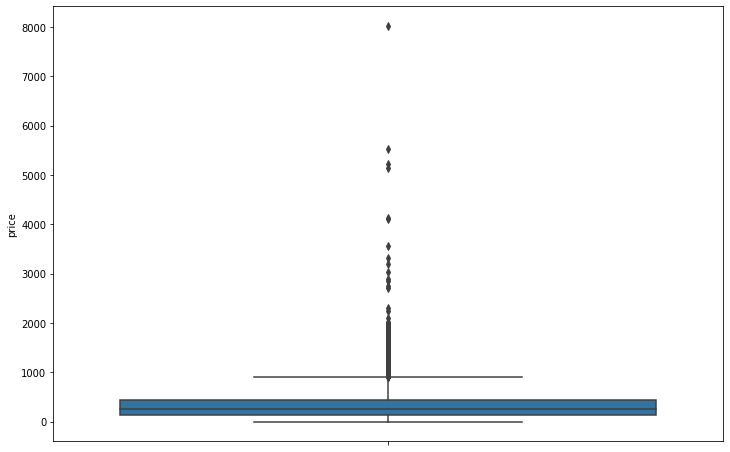

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y = df_test_fp['price'])

<Figure size 864x576 with 0 Axes>

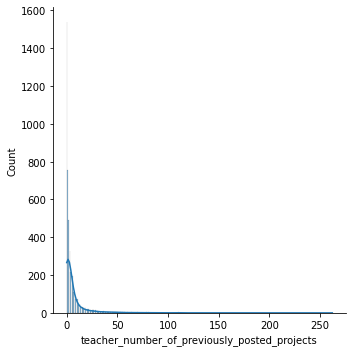

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df_test_fp['teacher_number_of_previously_posted_projects'],kde=True)

#TFIDF avg w2V

In [ ]:
with open('/content/gdrive/My Drive/Datasets/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))
tfidf_words = set(tfidf_vect.get_feature_names())

Ref Link : https://medium.com/analytics-vidhya/featurization-of-text-data-bow-tf-idf-avgw2v-tfidf-weighted-w2v-7a6c62e8b097

In [ ]:
from tqdm import tqdm
preprocessed_essays = x_train['essay'].values
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

# print(len(tfidf_w2v_vectors))
# print(len(tfidf_w2v_vectors[0]))

100%|██████████| 76473/76473 [02:41<00:00, 474.16it/s]


###TFIDF w2v for Test set

In [ ]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

100%|██████████| 32775/32775 [01:08<00:00, 475.86it/s]


##Final Dataframe

In [ ]:
x_tr_w2v = hstack(( x_train_state, x_train_teacher, x_train_grade, x_train_clean_sub,x_train_clean,x_train_price.T,x_train_teacher_ppp.T,tfidf_w2v_vectors,sentiment.values)).tocsr()
x_te_w2v = hstack(( x_test_state, x_test_teacher, x_test_grade, x_test_clean_sub,x_test_clean,x_test_price.T,x_test_teacher_ppp.T,tfidf_w2v_vectors_test,sentiment_test.values)).tocsr()


In [ ]:
def result(x_tr,x_te,y_train = y_train,y_test = y_test):
# """This function performs the cross validation on the train dataset

# input -> x_train,x_test
# output -> result of CV dataframe , best scores/params
# """

  model = DecisionTreeClassifier(random_state=10)              # Initializing the model
  params = {'max_depth':[1,5,10,50] ,'min_samples_split' : [5,10,100,500]}     #Params to check
  result = GridSearchCV(model , param_grid = params, cv = 3, scoring='roc_auc',n_jobs = -1, return_train_score = True)
  result.fit(x_tr,y_train)
  print(result.best_params_,result.best_score_)
  scores = pd.DataFrame.from_dict(result.cv_results_)

  heat_test = scores.pivot('param_max_depth','param_min_samples_split','mean_test_score')
  heat_train = scores.pivot('param_max_depth','param_min_samples_split','mean_train_score')
  
  #Plotting the heat map of scores agains the CV params

  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  plt.title('Test')
  sns.heatmap(heat_test,annot=True,cmap='Blues_r',linewidths=0.1)
  plt.subplot(1,2,2)
  plt.title('Train')
  sns.heatmap(heat_train,annot = True,linewidths=0.1)
  return result , scores

def result_fit(x_tr1,x_te1,result,y_train = y_train,y_test = y_test):
# ''' This function trains the model on the best params found through CV and predicts the output on test data
# Also, it plots the ROC Curve on the predicted data to see how well the model is performing'''

#initializing model with best params of CV
  fin_model = DecisionTreeClassifier(max_depth=result.best_params_['max_depth'],min_samples_split=result.best_params_['min_samples_split'],random_state=10)
  
  fin_model.fit(x_tr1,y_train)

  tr_pred = fin_model.predict(x_tr1)
  te_pred = fin_model.predict(x_te1)
  tr_pred_prob = fin_model.predict_proba(x_tr1)   # need prob scores for AUC-ROC curve
  te_pred_prob = fin_model.predict_proba(x_te1)

  x_tr_fpr,x_tr_tpr,x_tr_thresh = roc_curve(y_train,tr_pred_prob.flatten()[1::2])   # getting only the positive class prob for each data point
  x_te_fpr,x_te_tpr,x_te_thresh = roc_curve(y_test,te_pred_prob.flatten()[1::2])
  plt.plot(x_tr_fpr, x_tr_tpr, label="train AUC ="+str(auc(x_tr_fpr, x_tr_tpr)))
  plt.plot(x_te_fpr, x_te_tpr, label="test AUC ="+str(auc(x_te_fpr, x_te_tpr)))
  plt.legend()
  plt.xlabel('TPR')
  plt.ylabel("FPR")
  plt.title("ROC-AUC curve")
  plt.grid()
  plt.show()
  return tr_pred,te_pred

{'max_depth': 5, 'min_samples_split': 5} 0.6261917572268704


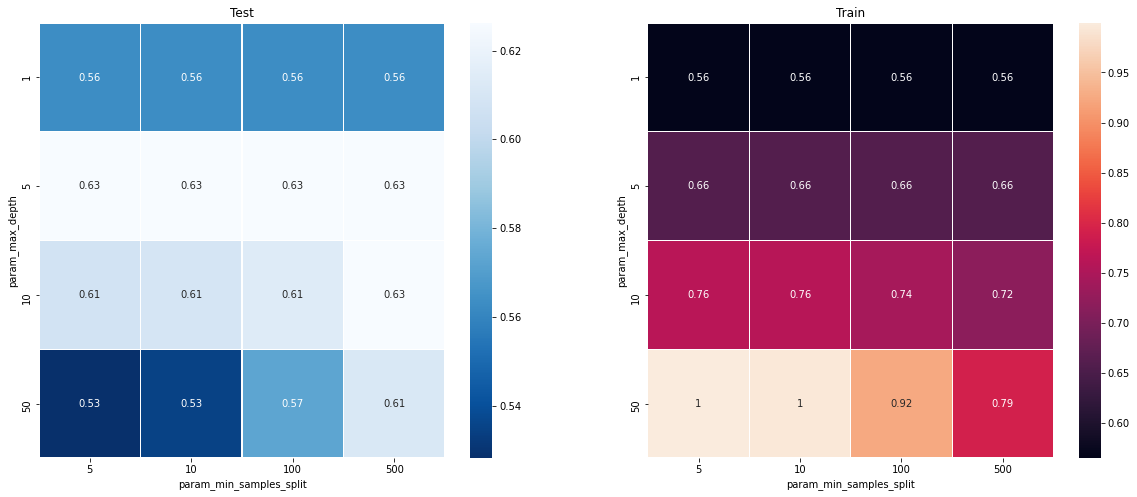

In [ ]:
# CAlling th aboove function to perform Cross Validation and plot the AUC  scores for every params combination
result_w2v,score_w2v = result(x_tr_w2v,x_te_w2v)

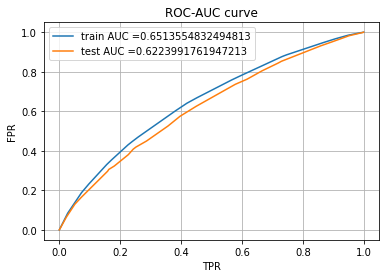

In [ ]:
#Calling a function to predict the output on test dataset to visualize the ROC curve

ytr_pred,yte_pred = result_fit(x_tr_w2v,x_te_w2v,result_w2v)

In [ ]:
def get_fp(y_pred,y_test):
# '''The function returns the false positive data'''
    test_pred = pd.Series(y_pred,index=y_test.index,name='Pred')
    x_fp = pd.concat([x_test,y_test,test_pred],axis=1)
    x_fp_fin = x_fp[(x_fp['project_is_approved'] == 0) & (x_fp['Pred'] == 1)]
    return x_fp_fin

In [ ]:
df_fp_w2v = get_fp(yte_pred,y_test)

In [ ]:
pt.add_row(['TFIDF-w2v','Decision Tree',f'{grid_clf.best_params_}',str(auc(x_te_fpr, x_te_tpr))])

##Wordcloud of FP data

In [ ]:
x_text1 = df_fp_w2v['essay'].str.cat(sep = ' ')

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(x_text1)

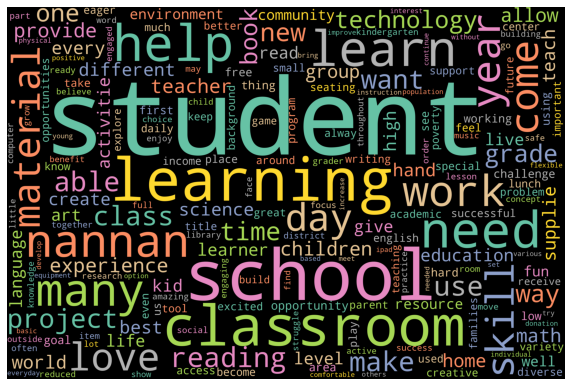

In [ ]:
plt.figure(figsize=(10,8))
plt.axis("off")
plt.imshow(wordcloud)

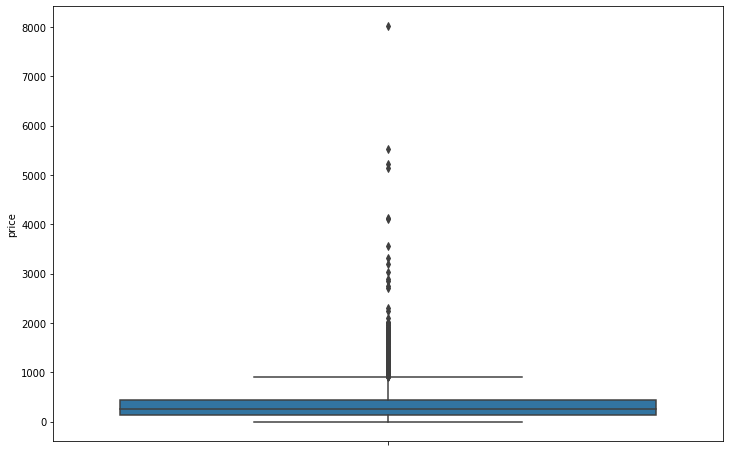

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y = df_fp_w2v['price'])

<Figure size 864x576 with 0 Axes>

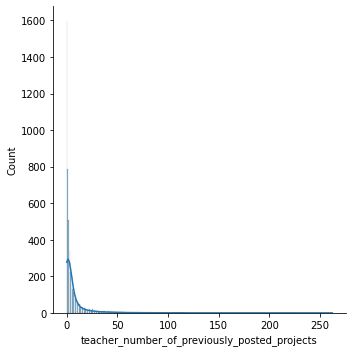

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df_fp_w2v['teacher_number_of_previously_posted_projects'],kde=True)

#Feature importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=10)

In [ ]:
#Finding best param without max_depth feature for Feature importance
params1 = {'min_samples_split':[5, 10, 100, 500]}

In [ ]:
result1 = GridSearchCV(model , param_grid = params1, cv = 3, scoring='roc_auc',n_jobs = -1, return_train_score = True)

In [ ]:
result1.fit(x_tr_tfidf,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 100, 500]},
             pre

In [ ]:
result1.best_params_

{'min_samples_split': 500}

In [ ]:
model_samp = DecisionTreeClassifier(min_samples_split=result1.best_params_['min_samples_split'],random_state=10)

In [ ]:
model_samp.fit(x_tr_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
len(model_samp.feature_importances_)

2605

##Discarding features with 0 importance

In [ ]:
feature_index = np.where(model_samp.feature_importances_ > 0)

In [ ]:
feature_index[0]

array([  41,   51,   62, ..., 2602, 2603, 2604])

In [ ]:
x_tr_tfidf.shape

(76473, 2605)

In [ ]:
x_tr_best_feat = x_tr_tfidf[:,list(feature_index[0])].toarray()

In [ ]:
x_te_best_feat = x_te_tfidf[:,feature_index[0]].toarray()

In [ ]:
x_tr_best_feat.shape

(76473, 1698)

#Logistic Regression on Best Features

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model_new = LogisticRegression(random_state=10,penalty='l1',n_jobs= -1)

##Hyperparameter tuning for LR

In [ ]:
params_log = {'C':list(np.logspace(-2,2,5))}

In [ ]:
g_cv_log = GridSearchCV(model_new,param_grid=params_log,n_jobs=-1)

In [ ]:
g_cv_log.fit(x_tr_best_feat,y_train)

In [ ]:
g_cv_log.best_params_

{'C': 1.0}

In [ ]:
g_cv_log.best_score_

0.8487178758467628

In [21]:
model_log = LogisticRegression(C = 1.0,random_state=10,n_jobs=-1)

In [ ]:
model_log = LogisticRegression(C = g_cv_log.best_params_['C'],random_state=10,n_jobs=-1)

In [23]:
model_log.fit(x_tr_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=10,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_tr_pred_log = model_log.predict_proba(x_tr_tfidf)
y_te_pred_log = model_log.predict_proba(x_te_tfidf)

In [25]:
tr_fpr_log,tr_tpr_log,thresh_tr_log = roc_curve(y_train,y_tr_pred_log.flatten()[1::2])
te_fpr_log,te_tpr_log,thresh_te_log = roc_curve(y_test,y_te_pred_log.flatten()[1::2])

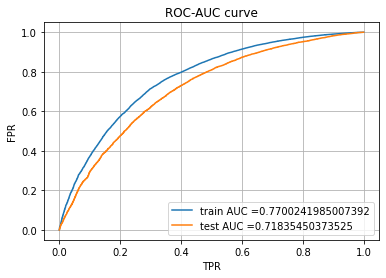

In [29]:
plt.plot(tr_fpr_log,tr_tpr_log,label="train AUC ="+str(auc(tr_fpr_log, tr_tpr_log)))
plt.plot(te_fpr_log,te_tpr_log,label="test AUC ="+str(auc(te_fpr_log, te_tpr_log)))
plt.legend()
plt.xlabel('TPR')
plt.ylabel("FPR")
plt.title("ROC-AUC curve")
plt.grid()
plt.show()

In [30]:
pt.add_row(['TFIDF','Logistic Regression',g_cv_log.best_params_,str(auc(te_fpr_log, te_tpr_log))])

#Pretty table

In [31]:
print(pt)

+------------+---------------------+---------------------------------------------+--------------------+
| Vectorizer |        Model        |               Hyper-parameter               |        AUC         |
+------------+---------------------+---------------------------------------------+--------------------+
|   TFIDF    |    Decision Tree    | {'max_depth': 10, 'min_samples_split': 500} | 0.6429494894274561 |
| TFIDF-w2v  |    Decision Tree    |     max_depth: 5, min_samples_split: 5}     |    0.622399176     |
|   TFIDF    | Logistic Regression |                  {C : 1.0}                  |  0.71835450373525  |
+------------+---------------------+---------------------------------------------+--------------------+
